In [4]:
#other useful packagesimport math
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Import cirq
import cirq
from cirq.ops import CZ, H

from qiskit import BasicAer, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

In [2]:
#mensaje secretp
mes = 'hello world'
print('Your super secret message: ',mes)

#tamaño inicial de la clave
n = len(mes)*3

# si el tamaño> 10 dividimos el mensaje
nlist = []
for i in range(int(n/10)):
    nlist.append(10)
if n%10 != 0:
    nlist.append(n%10)

print('Initial key length: ',n)

Your super secret message:  hello world
Initial key length:  33


In [7]:
def bitstring(bits):
    return ''.join('1' if e else '_' for e in bits)



Ahora que tú (Alice) tienes la llave, aquí está la gran pregunta: ¿cómo vamos a conseguir tu llave de Bob sin que los fisgones la intercepten? ¡Distribución de la llave cuántica! Aquí están los pasos y el panorama general (los efectos de las escuchas se discutirán más adelante):

Tú (Alice) generas una cadena aleatoria... la clave que deseas darle a Bob.
Tú (Alice) conviertes los bits de tu cadena en los correspondientes qubits.
Tú (Alice) envías esos qubits a Bob, PERO! rotas algunos al azar en una superposición. Esto efectivamente convierte tu llave en un ruido aleatorio. (Esto es bueno porque tus enemigos acechantes podrían medir tus qubits.)
Bob recibe tus qubits y aleatoriamente rota algunos qubits en la dirección opuesta antes de medirlos.
Alice y Bob comparten públicamente qué qubits han rotado. Cuando ambos hicieron lo mismo (o no hicieron nada o ambos rotaron), ¡saben que el valor del bit clave original llegó a Bob! (En general, se puede ver que sólo algunos de los bits de la llave original de Alice deberían llegar.)
Alice y Bob crean sus claves. Alicia modifica su clave original manteniendo sólo los bits que sabe que llegaron a Bob. Bob hace lo mismo.
¡Alice y Bob ahora tienen llaves que coinciden! Ahora pueden usar esta clave para cifrar y descifrar sus mensajes.

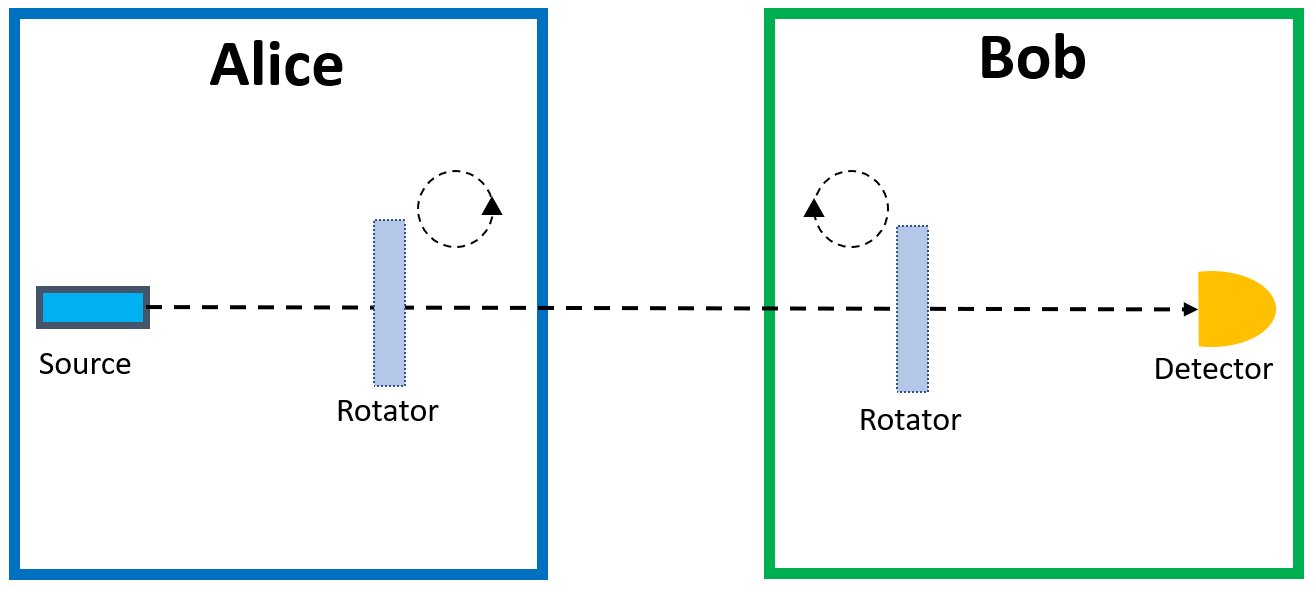


Paso 1: Alice genera una clave aleatoria

Tú y tu amigo necesitan una clave súper secreta para que puedas encriptar tu mensaje y tu amigo pueda desencriptarlo. Hagamos una llave... una llave pura y aleatoria.

Para hacer una cadena puramente aleatoria, usaremos la superposición cuántica. Un qubit en el xy-plano de la esfera de Bloch está en una superposición 50-50; el 50% de las veces se medirá como 0, y el 50% de las veces se medirá como 1. Hacemos que Alice prepare varios qubits como este y los mida para generar una cadena puramente aleatoria de 1s y 0s.


In [23]:



qubits = [cirq.GridQubit(i, 0) for i in range(10)]
circuit = cirq.Circuit(
  
  #cirq.H(*qubits),
  cirq.H.on_each(*qubits),
 
  cirq.measure(*qubits, key='m')
)
print("Circuit:")
print(circuit)

# Simulamos el circuito las veces que queramos, en este caso como
# es un generador de numeros aleatorios nos da igual.
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1)
print("Results:")
print(result)
print(result.data)
a= result.measurements

#con 10 bits tenemos 1024 números 

#Lo normalizamos para que nos aparezcan valores de 0 a 1.
#Cuantos más qubits tengamos mejor precisión obtendremos.

#numeroAleatorio=a*1/1023
#print(numeroAleatorio)
cosa=""
for i in a['m']:
    cosa=i

    

Circuit:
(0, 0): ───H───M('m')───
               │
(1, 0): ───H───M────────
               │
(2, 0): ───H───M────────
               │
(3, 0): ───H───M────────
               │
(4, 0): ───H───M────────
               │
(5, 0): ───H───M────────
               │
(6, 0): ───H───M────────
               │
(7, 0): ───H───M────────
               │
(8, 0): ───H───M────────
               │
(9, 0): ───H───M────────
Results:
m=1, 0, 0, 1, 0, 1, 0, 1, 1, 0
     m
0  598


Pasos 2-4: Enviar los Qubits de Alice a Bob
Alice convierte sus bits clave en los correspondientes estados qubits. Si un bit es un 0, preparará un qubit en el eje negativo z. Si el bit es un 1, preparará un qubit en el eje z positivo. A continuación, si Alice tiene un 1 en su cadena de rotación, rota su qubit clave con una puerta Hadamard. Luego envía el qubit a Bob. Si Bob tiene un 1 en su cadena de rotación, rota el qubit entrante en la dirección opuesta con una puerta Hadamard. Bob entonces mide el estado del qubit y registra el resultado. El circuito cuántico de abajo ejecuta cada uno de estos pasos

Traducción realizada con la versión gratuita del traductor www.DeepL.com/Translator